
# Before Starting this Tutorial...you need Requirements:
* NumPy: A fundamental package for computing arrays and matrices, along with mathematical functions.
* Pandas: A library for data manipulation and analysis, providing easy-to-use data structures like DataFrames.
* Matplotlib: a python library for data visualization and plotting.





In [ ]:
!pip install numpy pandas matplotlib

# Problem: Can we implement a predictive model for James Harden's performance in NBA games with the data in the reddit?

It all began with this Reddit post: https://www.reddit.com/r/nba/comments/dt0ucg/i_analyzed_james_hardens_performance_in_every_nba/. James Harden, a renowned NBA player, carried a bit of a reputation for his (alleged) affinity for strip clubs. Someone on Reddit got curious whether Harden's off-court preferences affected his game. So this person gathered data on the average ratings of strip clubs and James Harden's performance scores in various cities. Surprisingly, a correlation emerged between these two variables (see the link above for more details).

This analysis merely implies a correlation, so the causality remains uncertain. However, given the results from the reddit post, could we develop a predictive model to forecast James Harden's performance? What algrothirms can we employ to develop models? If so, can we place trust in the reliability of this model, or might there be overlooked factors influencing the outcomes?



## Framing this problem with AI

### What would be an appropriate implementation choice?

The goal of this problem is to develop predictive model. A linear regression, neural networks, or other machine learning algorithms would be appicable. The reddit post was based on the linear regression anlaysis, I contuned this framework to simplify the problem.
With a linaer model, gradient Descent would be the optimization method for training the model. This iterative optimization algorithm helps in minimizing the prediction error by adjusting model parameters.

### What parameters would be needed?
Any features that could impact James Harden's performance become input parameters in this scenario. The primary input feature in this context is strip club ratings. City-specific performance scores serve as a target, offering a basis for comparison with the model's predicted outcome. Weights and biases, assigned to the features, constitute additional parameter aspects. Other parameters relevant to Gradient Descent, such as learning rate and convergence criteria, are crucial considerations as well.

### What would be State/Action Representations?
The state might represent the combination of factors influencing James Harden's performance, such as the city he's playing in, the strip club ratings, and possibly other external factors.

## Data which will be used for the train the model
The Reddit user shared the dataset used for analysis (https://docs.google.com/spreadsheets/d/1hwDoaHcXqncb_l24NrxLCWTxE5pLaeKlU8r1Jnp39GQ/edit#gid=1286628669). Specifically, the user compiled data on City Strip Club Ratings, indicating the average Google review rating for the first 10 strip clubs in each city. The analysis also involved James Harden's performance statistics, including points scored, field goals, etc., spanning three seasons from 2015 to 2019. For this tutorial, I utilized the same dataset, averaging James Harden's points scored for each season over the three-year period.

Let's explore the data. I will use pand, the pathon libary for basic statistics.

In [ ]:
import pandas as pd

In [ ]:
# Let's import data first. Data is stored in CVS file.
file_path = 'redditdata.csv'
data = pd.read_csv(file_path)

Data is imported with Dataframe, which is similar to excel sheet. Let's see the dataframe with the first 10 row.

In [ ]:
first_5_rows = data.head()
print(first_5_rows)

   club_rating  points_scored
0         4.03      33.000000
1         3.95      26.666667
2         3.95      29.625000
3         3.91      29.750000
4         3.87      37.000000


Let's explore the basis statistics including the number of cases, means, standard diviation, min, max, and more.

In [ ]:
basic_stats = data.describe()
print(basic_stats)

       club_rating  points_scored
count    23.000000      23.000000
mean      3.654783      30.701087
std       0.252476       4.387548
min       2.970000      22.666667
25%       3.515000      27.333333
50%       3.690000      30.000000
75%       3.845000      34.000000
max       4.030000      38.750000


Visualize the overall data. For visualization, I  utilize the Matplotlib library.

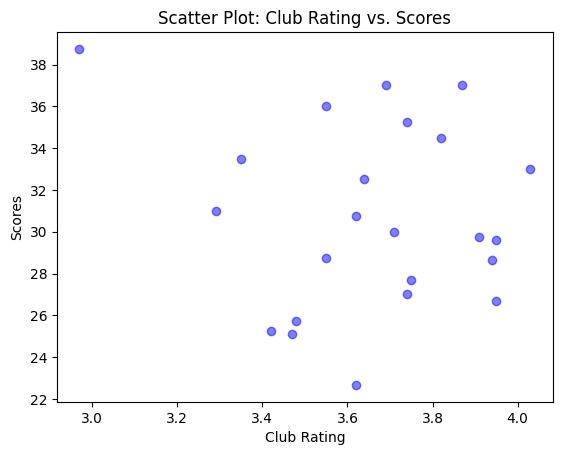

In [ ]:
import matplotlib.pyplot as plt

x = data['club_rating']
y = data['points_scored']

# Plotting a scatter plot
plt.scatter(x, y, alpha=0.5, color='blue')
plt.title('Scatter Plot: Club Rating vs. Scores')
plt.xlabel('Club Rating')
plt.ylabel('Scores')
plt.show()

## Data Proceeding

To implement the model, data will be processed using NumPy. NumPy provides convenient and optimized methods for computing arrays and matrices, making it easier to implement algorithms within the context of machine learning workflows. Its efficient array operations and numerical capabilities are particularly valuable in handling the mathematical computations essential for model development

In [ ]:
import numpy as np

x = np.array(data['club_rating'])
y = np.array(data['points_scored'])

## Details on Algorithims to solve this problems


### Linear Regression
Linear Regression assumes a linear relationship between the input features and the target variable. Given that the analysis from the Reddit post suggests a linear relationship between strip club ratings and James Harden's performance, my initial approach would be to apply this algorithm to the problem. Linear Regression offers easily interpretable results, allowing for a straightforward understanding of the impact of cities on James Harden's performance.

This model provides insights into how cities influence Harden's performance, and its simplicity and computational efficiency make it a suitable choice for grasping concepts like gradient descent. However, please note that this model depends on the assumption of a linear relationship between input features and the target variable, as I mentioned above. If the relationship between strip club ratings and James Harden's performance is nonlinear, the application of this algorithm may not yield successful results.

Readers of this tutorial should bear in mind that Linear Regression provides valuable insights but it might not be the optimal model for this specific problem if the relationship is not linear. Further exploration and consideration of alternative models may be necessary for a more accurate prediction.

The basic framework of the model is as follows:

𝑓(𝑥𝑖,𝑤,𝑏)=𝑤⋅𝑥𝑖+𝑏

Here,  𝑥𝑖  is an input feature,  𝑤  is weight (a slope of line), and  𝑏  is the bias.

For the specific example I provided here:

f{club rating, w, b}=𝑤⋅club rating+𝑏

In simple terms, I'm looking for a straight line that minimizes the distances between the line and the data points. Run the code for visualization.

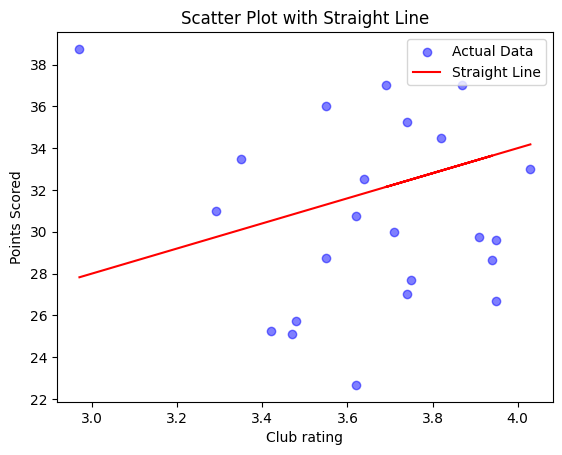

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = data['club_rating'].values
y = data['points_scored'].values

m = 6  # Slope
b = 10  # Intercept


y_straight_line = m * x + b


plt.scatter(x, y, alpha=0.5, label='Actual Data', color='blue')
plt.plot(x, y_straight_line, label='Straight Line', color='red')

plt.title('Scatter Plot with Straight Line')
plt.xlabel('Club rating')
plt.ylabel('Points Scored')
plt.legend()
plt.show()

### Loss Function

The goal of this task is identify the optimal weights and bias parameters that minimize the differences  between predicted outcome from the model and the actual target value. The loss function quantifies the error or discrepancy in the model's predictions, providing a numerical representation of how well or poorly the model is performing. By adjusting the weights and biases during the training process, the model aims to minimize this loss, ultimately refining its ability to accurately predict James Harden's points socre in a game based on the input features, such as the average rating fo strip clubs in a city.

Depending on what tasks woking one, different types of loss funcation can be used. In this contex, James' performances is quanitied with points scored with numbers. Since the target is the outcomes in this case, mean square error is used as the function. Let's notate the loss function as  $J$

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

$$J(w,b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - f(x_i, w,b))^2$$



* $n$:  the number of data points or observations
* $y_i$:the actual target value for the i-th observation
* $\hat{y}_i$ : the predicted value for the i-th observation



Let's implement a Mean Squared Error (MSE) loss function for linear regression in Python.

In [ ]:

def mse_loss_function(x, y, w, b):
    """
    x is np.array including all cases of input feature
    y is np.array of target values of all cases
    w is a weight parameter
    b is a bias parameter
    """
    n = x.shape[0]  # number of cases (examples)
    loss_sum = 0

    for i in range(n):
        y_pred = w * x[i] + b
        loss = (y_pred - y[i]) ** 2
        loss_sum += loss

    total_loss = (1 / (2 * n)) * loss_sum

    return total_loss


### Gradient Descent

Gradient Descent follows the slope downward in the curve, aiming to minimize a given task by seeking the lowest points in the loss function. It serves as an iterative method to adjust parameters, effectively reducing the loss function. The algorithm begins with an initial set of parameters, comprising weights and biases for the model. Calculating the gradient of the loss function with respect to each parameter reveals the direction leading to the steepest decrease in the loss.

The primary task involves adjusting the parameters (weights and bias) in the direction of the gradient descent to diminish the value of the loss function. The step size in moving towards the optimal point is determined by the learning rate. Updating parameters is achieved by subtracting the result from the current parameter values.

### Gradient Decents for the loss function in Linear Regression

The gradient is the straight slope intersecting with the curve or loss function. We can obtain it through
the partial derivative of the loss function with repsect to the parameters. It indeed quantifies how much the loss function changes concerning a small change in the parameters.You might need to recall Calculus 101, the way to obtain the partial derivative for the equation.

In our case(linear regression), the loss function is given as follow:

$$J(w,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i, w,b))^2 = \frac{1}{n} \sum_{i=1}^{n}(y_i - (w \cdot x_i+b))^2$$

Partial derivative with respect to $w$:
$$\frac{\partial J(w, b)}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i(y_i - (w \cdot x_i + b))$$

Partial derivative with respect to $b$:
$$\frac{\partial J(w, b)}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w \cdot x_i + b))$$






Let's implement the function to obtain gradients with respect to $w$ and $b$ in Python.

In [ ]:
## Gradient Descent
## Will return gradients

def gradient_descent(x, y, w, b):
    """
    x is np.array including all cases of input feature
    y is np.array of target values of all cases
    w is a weight parameter
    b is a bias parameter
    """

    n = x.shape[0] # number of cases (examples)
    w_gradient = 0
    b_gradient = 0

    for i in range(n):
        y_pred = w * x[i] + b
        dj_dw_i = (y_pred - y[i]) * x[i]
        dj_db_i = y_pred - y[i]

        w_gradient += dj_dw_i
        b_gradient += dj_db_i

    w_gradient /= n
    b_gradient /= n

    return w_gradient, b_gradient




### Updating parameters with Gradient Descent

We have learned the algorithm to determine the direction for decreasing the loss. Using gradient descent, we initialize the model parameters (w and b in our case) with random numbers and iteratively update these parameters to find the optimal values that minimize the loss function.

As mentioned earlier, the gradient of the loss function points toward lower values of the loss, but it doesn't specify the actual distance to move. We determine how much to update the parameter by moving in the opposite direction of the gradient, and the step size of this update is controlled by the learning rate. The learning rate defines the magnitude of the update, influencing how far we move along the gradient in each iteration.

Here is the formular to update the parameters.

$$\theta= \theta - \alpha \cdot \nabla J(\theta)$$

*   $Θ$: the parameter being updated. In our case, it would be either $w$ or $b$.
*   $α$: the learning rate
*   $\nabla J(\theta)$: the gradient of the loss function with respect to the parameter

In the case of linear regrsesion, we can update as follow.

$$\text{Repeat until converging:} \\
\hspace{1em} w \leftarrow w - \alpha \frac{\partial J(w, b)}{\partial w} \\
\hspace{1em} b \leftarrow b - \alpha \frac{\partial J(w, b)}{\partial b}$$

Let's implement the function to update parameters of linear regression in Python.



In [ ]:
def update_parameters(x, y, w, b, alpha, num_iters):
    """
    x is np.array including all cases of input feature
    y is np.array of target values of all cases
    w is a weight parameter
    b is a bias parameter
    alpha is a learning rate
    num_iters is the number of iterations for updating
    """

    loss_history=[]
    parameters_history=[]

    for i in range(num_iters):
        w_gradient, b_gradient = gradient_descent(x, y, w, b)

        # Print gradients for monitoring

        # Update parameters
        w = w - alpha * w_gradient
        b = b - alpha * b_gradient

         # to keep tracking of loss values

        loss_history.append(mse_loss_function(x, y, w,b))
        parameters_history.append([w,b])

    return w, b, loss_history, parameters_history






## Training the model
It's time to find the optimal weight and bias by integrating all implementations.

In [ ]:
## initial value (staring with 0)
w_inital=0
b_inital=0

#Decide learning rates and # number of interations
learning_rate=0.01
num_iters = 100


w_optimal, b_optimal, loss_history, parameters_history = update_parameters(x, y, w_inital, b_inital, learning_rate, num_iters)

print("Optimal Weight:", w_optimal)
print("Optimal Bias:", b_optimal)

Optimal Weight: 7.736811851600071
Optimal Bias: 2.2721684609133335


Check how the model was trained.

In [ ]:
import math

for i in range (num_iters):
    if i% math.ceil(num_iters/5) == 0:
        print(f"Iteration {i}: Cost {loss_history[i]} ",
          f"w: {parameters_history[i][0]}, b:{parameters_history[i][1]}")

Iteration 0: Cost 355.1763602625152  w: 1.120784420306261, b:0.3070108695695652
Iteration 20: Cost 12.726902827600725  w: 7.473675750625637, b:2.0707972456964425
Iteration 40: Cost 12.044757895761455  w: 7.748202903920325, b:2.178464862562739
Iteration 60: Cost 12.038398501103643  w: 7.752451027943868, b:2.2124653538638155
Iteration 80: Cost 12.033383809303517  w: 7.744687423243699, b:2.2431653949744255


<function matplotlib.pyplot.show(close=None, block=None)>

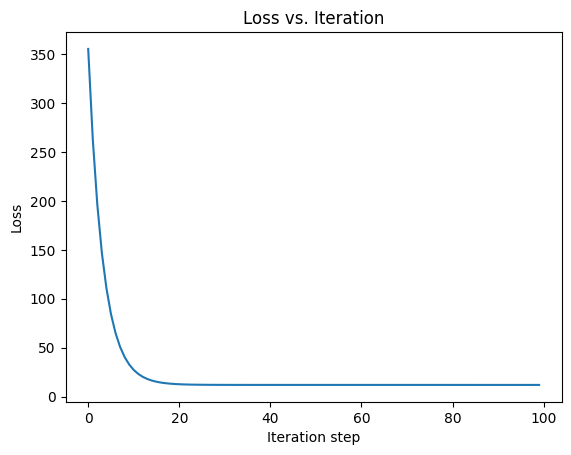

In [ ]:
plt.plot(loss_history)
plt.title('Loss vs. Iteration')
plt.ylabel('Loss')
plt.xlabel('Iteration step')
plt.show

Now that we have obtained the values for weight and bias, can we ensure that these are optimal values that lead the model to predict James Harden's performance correctly? How can we quantify the quality of the trained model? In linear regression, R-squared is typically used to quantify the quality of model training. R-squared can be computed with the following formula:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$



We can check our model's R-squared value. If it is close to 1, we can say our model predicts the score accurately.

In [ ]:
#-rsquare
def calculate_r_squared(w, b, input_feature, target):
    """
    Parameters:
    w (float): weight we obtained after the trainidng
    b(float): weight we obtained after the trainidng
    input_feature (np.array): Array of input feature.
    target (np.array): Array of actual target values.

    Returns:
    float: R-squared value.
    """

    predicted = w*input_feature + b

    mean_actual = np.mean(target)
    numerator = np.sum((target- predicted) ** 2)
    denominator = np.sum((target - mean_actual) ** 2)

    r_squared = 1 - (numerator / denominator)

    return r_squared


In [ ]:
r_squared_value = calculate_r_squared(w_optimal, b_optimal,x, y)
print(r_squared_value)

-0.3064945028464854


It's quite disappointing. The R-squared value is not even close to 1; in fact, it's a negative value. How can we fix this? How can we improve the model? One nex approach is to increase the number of iterations and observe how the model performs. Let's do with 1000.


In [ ]:
#interactions with 1000
new_num_iters = 1000

new_w_optimal, new_b_optimal, new_loss_history, new_parameters_history = update_parameters(x, y, w_inital, b_inital, learning_rate, new_num_iters)

print("Optimal Weight:", new_w_optimal)
print("Optimal Bias:", new_b_optimal)

Optimal Weight: 7.369772517235999
Optimal Bias: 3.619321277620007


In [ ]:
for i in range (num_iters):
    if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i}: Cost {loss_history[i]} ",
          f"w: {new_parameters_history[i][0]}, b:{new_parameters_history[i][1]}")

Iteration 0: Cost 355.1763602625152  w: 1.120784420306261, b:0.3070108695695652
Iteration 10: Cost 27.308559902331055  w: 6.370046343785628, b:1.7536601776523306
Iteration 20: Cost 12.726902827600725  w: 7.473675750625637, b:2.0707972456964425
Iteration 30: Cost 12.076098704858447  w: 7.703110114175876, b:2.1497470771514613
Iteration 40: Cost 12.044757895761455  w: 7.748202903920325, b:2.178464862562739
Iteration 50: Cost 12.040964705758041  w: 7.7544246696454335, b:2.1965850282451864
Iteration 60: Cost 12.038398501103643  w: 7.752451027943868, b:2.2124653538638155
Iteration 70: Cost 12.03588888415947  w: 7.748750596602785, b:2.2278682604981777
Iteration 80: Cost 12.033383809303517  w: 7.744687423243699, b:2.2431653949744255
Iteration 90: Cost 12.03088096051727  w: 7.740549146273563, b:2.258435129234017


<function matplotlib.pyplot.show(close=None, block=None)>

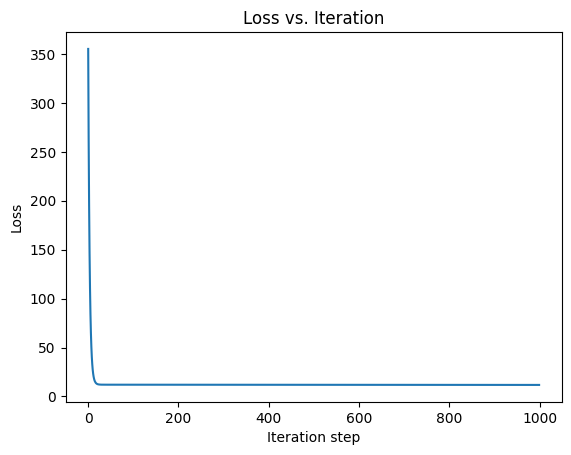

In [ ]:
plt.plot(new_loss_history)
plt.title('Loss vs. Iteration')
plt.ylabel('Loss')
plt.xlabel('Iteration step')
plt.show

The scale is too large; let's divide and plot the results at the end of the iterations.

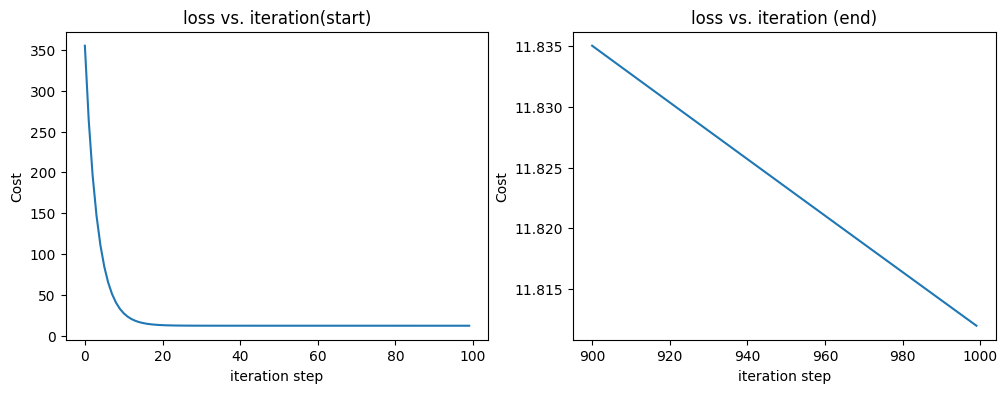

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(loss_history[:900])
ax2.plot(900 + np.arange(len(new_loss_history[900:])), new_loss_history[900:])


ax1.set_title("loss vs. iteration(start)")
ax2.set_title("loss vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()


In [ ]:
new_r_squared_value = calculate_r_squared(new_w_optimal, new_b_optimal,x, y)
print(new_r_squared_value)

-0.28296439027610054



It is still disappointing. Let's try using a very large number of iterations. How about 1,000,000?

In [ ]:
#interactions with  1000000
large_num_iters =  1000000

large_w_optimal, large_b_optimal, large_loss_history, large_parameters_history = update_parameters(x, y, w_inital, b_inital, learning_rate, large_num_iters)

print("Optimal Weight:", large_w_optimal)
print("Optimal Bias:", large_b_optimal)


In [ ]:
for i in range (num_iters):
    if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i}: Cost {loss_history[i]} ",
          f"w: {large_parameters_history[i][0]}, b:{large_parameters_history[i][1]}")

Iteration 0: Cost 355.1763602625152  w: 1.120784420306261, b:0.3070108695695652
Iteration 10: Cost 27.308559902331055  w: 6.370046343785628, b:1.7536601776523306
Iteration 20: Cost 12.726902827600725  w: 7.473675750625637, b:2.0707972456964425
Iteration 30: Cost 12.076098704858447  w: 7.703110114175876, b:2.1497470771514613
Iteration 40: Cost 12.044757895761455  w: 7.748202903920325, b:2.178464862562739
Iteration 50: Cost 12.040964705758041  w: 7.7544246696454335, b:2.1965850282451864
Iteration 60: Cost 12.038398501103643  w: 7.752451027943868, b:2.2124653538638155
Iteration 70: Cost 12.03588888415947  w: 7.748750596602785, b:2.2278682604981777
Iteration 80: Cost 12.033383809303517  w: 7.744687423243699, b:2.2431653949744255
Iteration 90: Cost 12.03088096051727  w: 7.740549146273563, b:2.258435129234017


In [ ]:
print(len(large_loss_history))

1000000


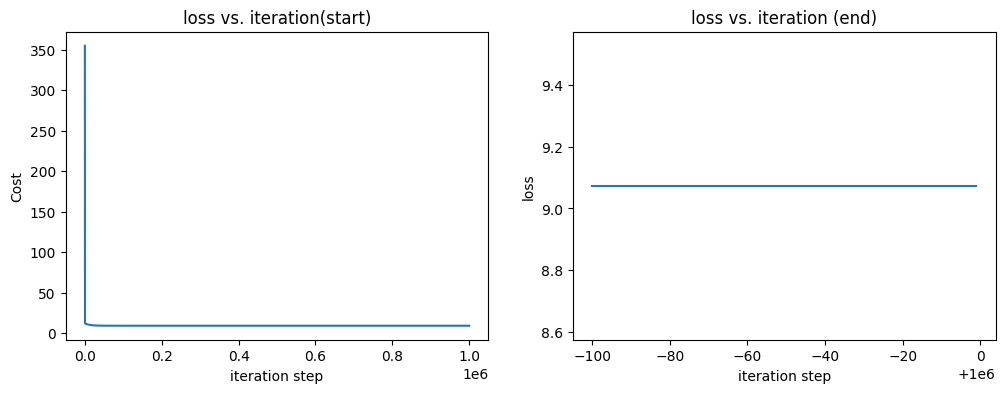

In [ ]:
cut_point = len(large_loss_history)-100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(large_loss_history[:cut_point])
ax2.plot(cut_point + np.arange(len(large_loss_history[cut_point :])), large_loss_history[cut_point:])


ax1.set_title("loss vs. iteration(start)")
ax2.set_title("loss vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('loss')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()


It appears that the loss value does not change after the iterations. Let's check r-square

In [ ]:
large_r_squared_value = calculate_r_squared(large_w_optimal, large_b_optimal,x, y)
print(large_r_squared_value)

0.01444670041848961



It is slightly better. As I mentioned, since our model has converged, this would be the best value we can obtain through training.

## Testing: Model's Generazlability

Can we actually ensure that the model predicts unseen examples? We have more data that we haven't included in the test set.

| City           | Strip Club Rating | James Harden's Performance |
| -------------- | ----------------- | -------------------------- |
| Oklahoma City  | 3.76              | 25.125                     |
| Charlotte      | 3.31              | 24.75                      |
| Orlando        | 3.75              | 39.25                      |
| Orlando        | 3.94              | 28.625                     |
| San Francisco  | 3.5               | 32.75                      |



In [ ]:
test_x = np.array([3.76, 3.31, 3.75, 3.94, 3.5])
test_y = np.array([25.125, 24.75, 39.25, 28.625, 32.75])

In [ ]:
test_r_squared_value = calculate_r_squared(large_w_optimal, large_b_optimal,test_x, test_y)
print(test_r_squared_value )

-0.058751979900992124


## Things to consider

Can we say our model perform well? It did not predict well. What would be the problem? If you are a scout, would you want to apply such a model to scout sports players? Probably not. What would be our problems in this task?

Let's consider the following questions.


1. We simplified the model by considering only one feature. Do you think that is sufficient? If not, what other factors could you consider?



> Considering only one feature may not be sufficient to accurately predict James Harden's performance in NBA games. His performance can be influenced by various factors, including the quality of the opposing team, game conditions, and his physical condition. In our analysis, we only considered the average rating in the city, and while there was a correlation (as the reddit user analyzed), we cannot ensure that it actually affected his performance. Therefore, the validity of the model is not achieved. To build a more robust and reliable model, it would be beneficial to include additional relevant features in the analysis.



2.We simplified the model using linear regression. Even tough we include more factors as input features to improve the model, can we assume that this features and James's performance are linearly related? What alternative approaches could be considered besides linear regression?

> Linear regression assumes a linear relationship between the input features and the target variables. Even though we would include more factors as input features to improve the model, assuming linear relationships between these features and James Harden's performance may not be appropriate In real world, the relationships among factors are  more complex. The James Harden's cases might not be an exception. Therefore, it is too risky to assume a lieanr relationship between the average rating of strip clubs (or even other features) in a city and his performance.  

> To explore this complexity, an alternative approach could be using neural networks, which is covered in our class. With neural networks, we can allow the model to learn complex mappings between input features and James Harden's performance. Neural networks can automatically adapt and discover intricate patterns between input features and targets, potentially providing a more accurate representation of the underlying dynamics among varaibles which influencing James Harden;s performance.






